### **Loading the data set**

In [ ]:
import pandas as pd

file_path = '/content/hospital data analysis.csv'
hospital_data = pd.read_csv(file_path)
hospital_data.info()
hospital_data.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Patient_ID      984 non-null    int64 
 1   Age             984 non-null    int64 
 2   Gender          984 non-null    object
 3   Condition       984 non-null    object
 4   Procedure       984 non-null    object
 5   Cost            984 non-null    int64 
 6   Length_of_Stay  984 non-null    int64 
 7   Readmission     984 non-null    object
 8   Outcome         984 non-null    object
 9   Satisfaction    984 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 77.0+ KB


,Patient_ID,Age,Gender,Condition,Procedure,Cost,Length_of_Stay,Readmission,Outcome,Satisfaction
0,1,45,Female,Heart Disease,Angioplasty,15000,5,No,Recovered,4
1,2,60,Male,Diabetes,Insulin Therapy,2000,3,Yes,Stable,3
2,3,32,Female,Fractured Arm,X-Ray and Splint,500,1,No,Recovered,5
3,4,75,Male,Stroke,CT Scan and Medication,10000,7,Yes,Stable,2
4,5,50,Female,Cancer,Surgery and Chemotherapy,25000,10,No,Recovered,4


### **Data Cleaning & Preprocessing**

In [ ]:
# Checking for missing values
missing_values = hospital_data.isnull().sum()

# Checking for duplicate values
duplicate_values = hospital_data.duplicated().sum()

# Checking for outliers in numeric columns
numeric_columns = hospital_data.select_dtypes(include=['int64', 'float64']).columns
outliers = hospital_data[numeric_columns].describe()

print("Missing Values:")
print(missing_values)
print("\nDuplicate Values:")
print(duplicate_values)
print("\nOutliers:")
print(outliers)

Missing Values:
Patient_ID        0
Age               0
Gender            0
Condition         0
Procedure         0
Cost              0
Length_of_Stay    0
Readmission       0
Outcome           0
Satisfaction      0
dtype: int64

Duplicate Values:
0

Outliers:
        Patient_ID         Age          Cost  Length_of_Stay  Satisfaction
count   984.000000  984.000000    984.000000      984.000000    984.000000
mean    500.329268   53.754065   8367.479675       37.663618      3.598577
std     288.979531   14.941135   7761.990976       19.595805      0.883002
min       1.000000   25.000000    100.000000        1.000000      2.000000
25%     250.750000   45.000000   1000.000000       21.000000      3.000000
50%     500.500000   55.000000   6000.000000       38.000000      4.000000
75%     750.250000   65.000000  15000.000000       54.250000      4.000000
max    1000.000000   78.000000  25000.000000       76.000000      5.000000


No missing values in the data.
No Duplicate values in the data.

Outliers detection:
Age and Satisication seems ok.
Cost: between 100 to 25,000 so, For complex surgeries like cancer needed high cost.
length of stay says that if we stay more than 50 days that might be severe conditions or treatments needed.


### **Exploratory Data Analysis**

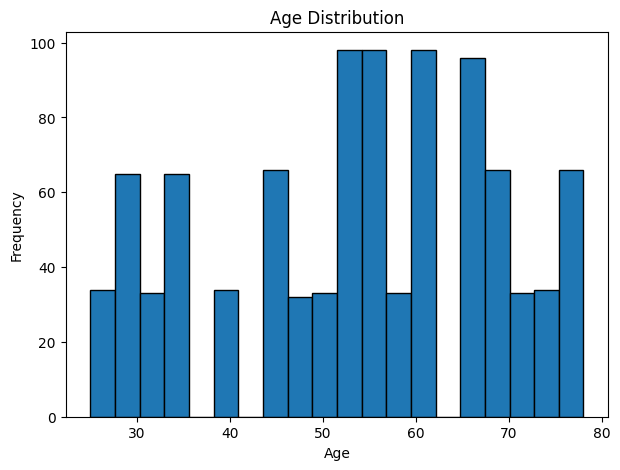

In [ ]:
import matplotlib.pyplot as plt

# Age Distribution
plt.figure(figsize=(7,5))
plt.hist(hospital_data['Age'], bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


Many Patients lies between age of 45 and 65.
Older patients are at 75 age.
Younger patients are around the age of 25.

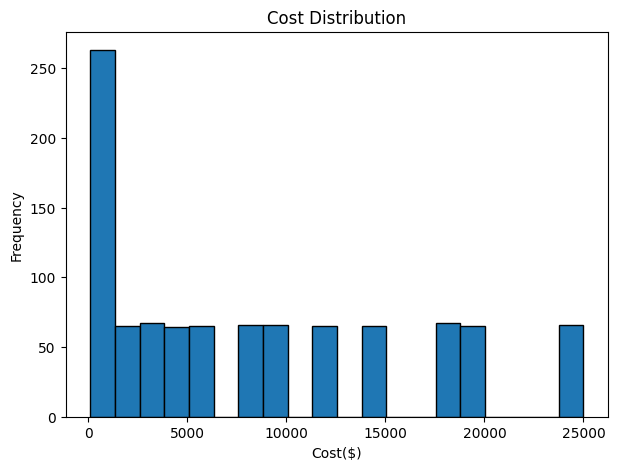

In [ ]:
# Cost Distribution
plt.figure(figsize=(7,5))
plt.hist(hospital_data['Cost'], bins=20, edgecolor='black')
plt.title('Cost Distribution')
plt.xlabel('Cost($)')
plt.ylabel('Frequency')
plt.show()

Most treatments cost 1000 and 15,000 dollars and  Costly treatments are reaching 25,000 $ as well

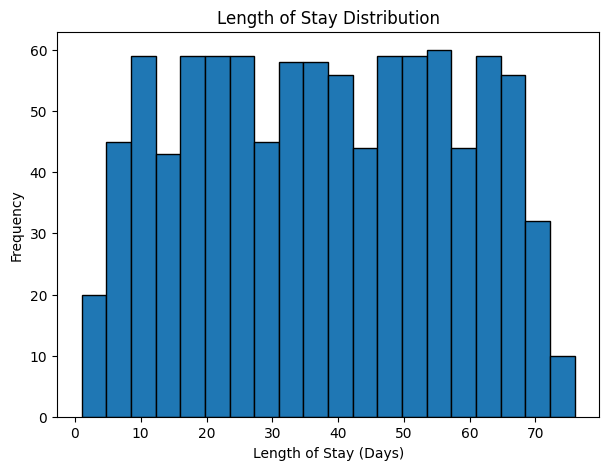

In [ ]:
# Length of Stay Distribution
plt.figure(figsize=(7,5))
plt.hist(hospital_data['Length_of_Stay'], bins=20, edgecolor='black')
plt.title('Length of Stay Distribution')
plt.xlabel('Length of Stay (Days)')
plt.ylabel('Frequency')
plt.show()

Mostly, patients stayed upto 20 to 55 days. But, some patients stayed up to 75 days as well.


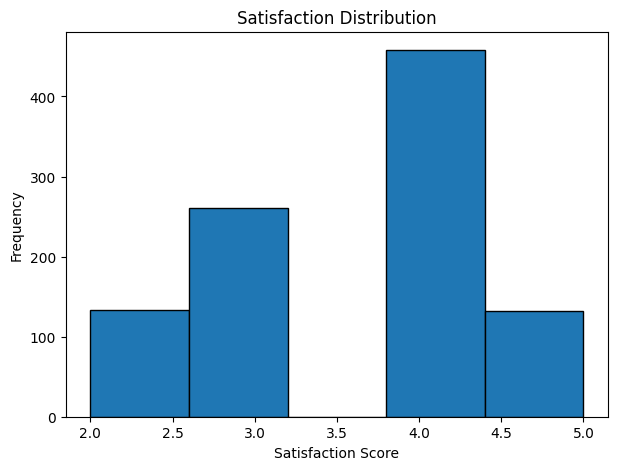

In [ ]:
# Satisfaction Distribution
plt.figure(figsize=(7,5))
plt.hist(hospital_data['Satisfaction'], bins=5, edgecolor='black')
plt.title('Satisfaction Distribution')
plt.xlabel('Satisfaction Score')
plt.ylabel('Frequency')
plt.show()

Most patients rated 4.0 and some patients rated 2 or 3.

**Plotting Gender Distribution**

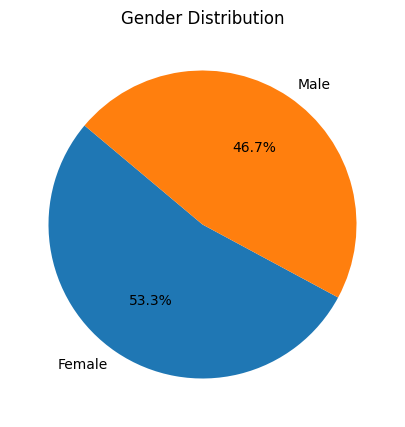

In [ ]:
# plotting by gender
gender_counts = hospital_data['Gender'].value_counts()
plt.figure(figsize=(7,5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.show()

Ref: Almost equal number of patients from each gender

**Analyzing 10 most common conditions**

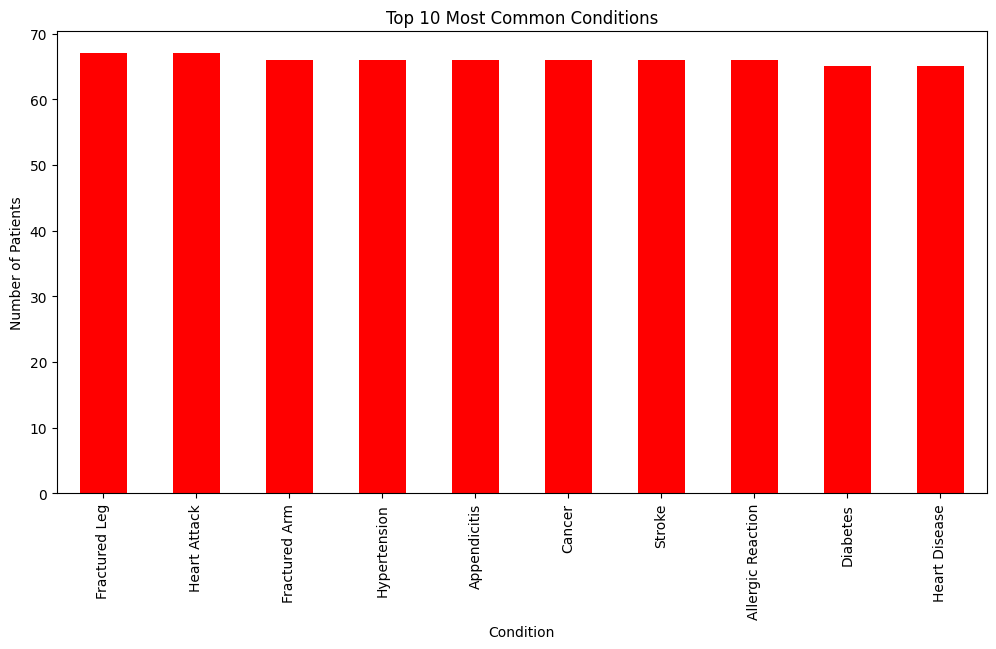

In [ ]:
# Analyzing most common conditions
top_conditions = hospital_data['Condition'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_conditions.plot(kind='bar', color='red')
plt.title('Top 10 Most Common Conditions')
plt.xlabel('Condition')
plt.ylabel('Number of Patients')
plt.show()

Conditions like Heart Disease, Diabetes, Cancer, Stroke are the most common.

**Analyzing most common procedures**

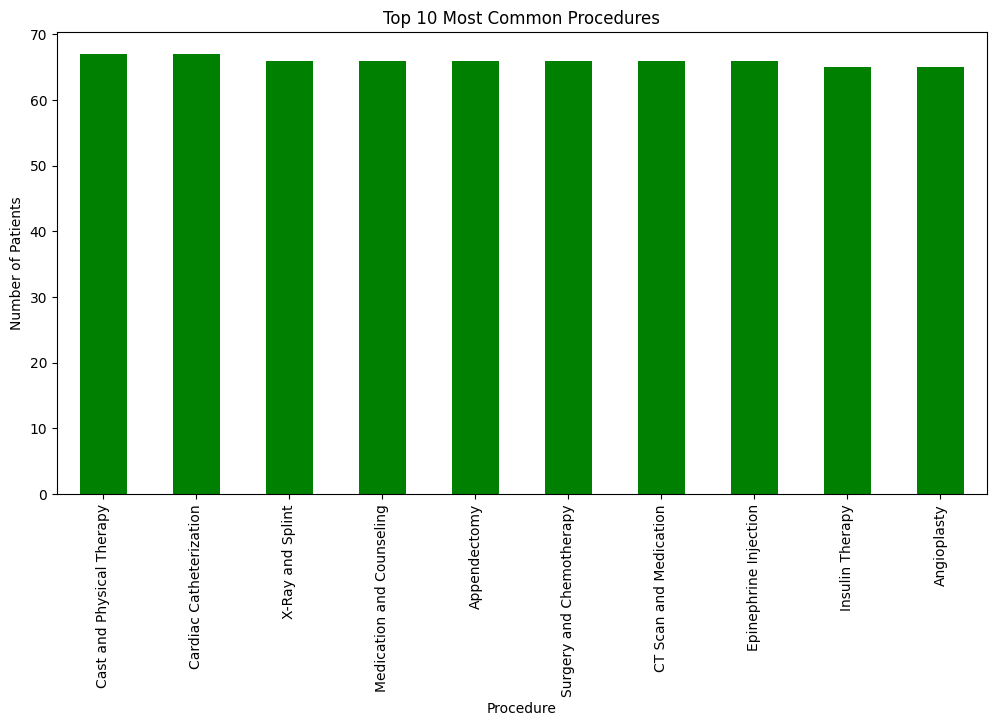

In [ ]:
# Analyzing most common procedures
top_procedures = hospital_data['Procedure'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_procedures.plot(kind='bar', color='green')
plt.title('Top 10 Most Common Procedures')
plt.xlabel('Procedure')
plt.ylabel('Number of Patients')
plt.show()

Procedures related to major conditions like Angioplasty, Insulin Therapy, Surgery and Chemotherapy, CT Scan are frequently performed.

**Readmission Rates**

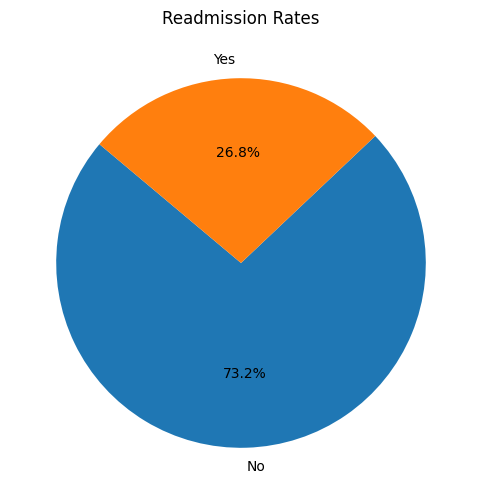

In [ ]:
# Readmission Rates
readmission_counts = hospital_data['Readmission'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(readmission_counts, labels=readmission_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Readmission Rates')
plt.show()

Majority of patients are not readmitted.
A low percentage of patients are readmitted that indicates good treatment is provided or for follow up,

**Outcome Distribution**

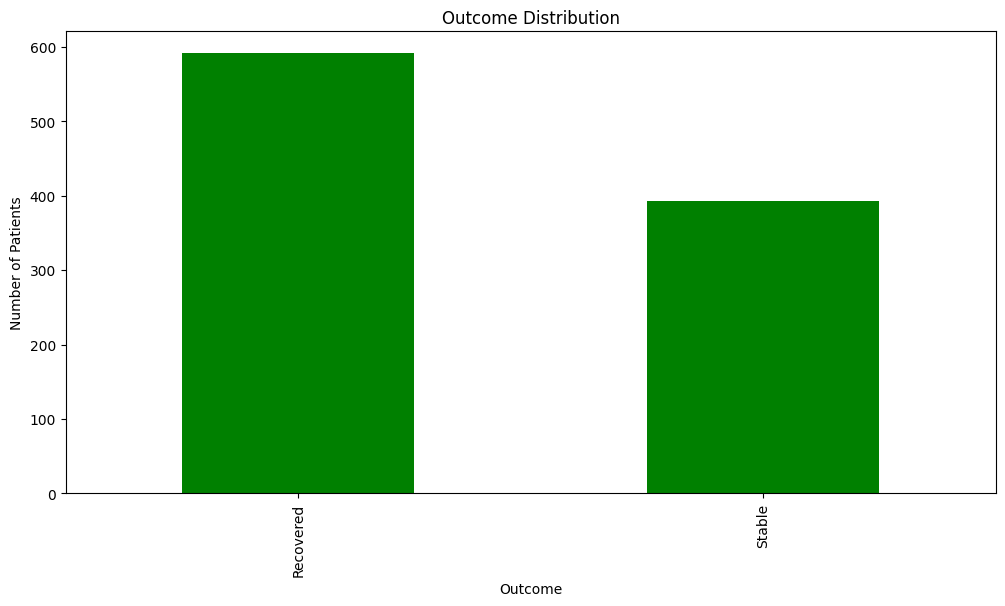

In [ ]:
# Outcome Distribution
outcome_counts = hospital_data['Outcome'].value_counts()
plt.figure(figsize=(12, 6))
outcome_counts.plot(kind='bar', color='green')
plt.title('Outcome Distribution')
plt.xlabel('Outcome')
plt.ylabel('Number of Patients')
plt.show()

Most of the patients are recovered and stable. Less deceased due to major complications.

### **Correlation(Statistical Analysis)**

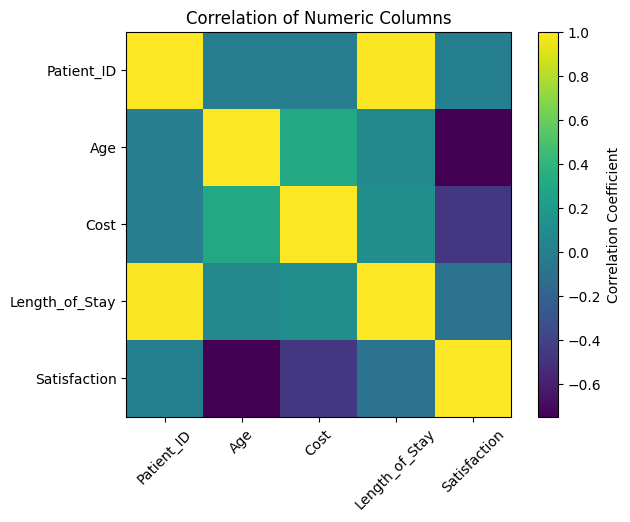

,Patient_ID,Age,Cost,Length_of_Stay,Satisfaction
Patient_ID,1.000000,-0.002935,-0.004168,0.989917,0.005263
Age,-0.002935,1.000000,0.303816,0.075080,-0.750429
Cost,-0.004168,0.303816,1.000000,0.114206,-0.469658
Length_of_Stay,0.989917,0.075080,0.114206,1.000000,-0.080891
Satisfaction,0.005263,-0.750429,-0.469658,-0.080891,1.000000


In [ ]:
# Checking correlation between numeric columns
correlation_matrix = hospital_data[numeric_columns].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(7,5))
plt.imshow(correlation_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation of Numeric Columns')
plt.show()

# Displaying the correlation matrix
correlation_matrix


Age vs. Cost - Correlation: 0.3:

Older patients are spending higher costs, which is expected for severe conditions.

Age vs. Satisfaction -Correlation: -0.75:

Strong negative correlation. As age increases, satisfaction decreases significantly.

This is indicating dissatisfaction among older patients, due to higher costs or extended treatments.

Cost vs. Satisfaction - Correlation: -0.47:

Moderate negative correlation. Higher costs may result in lower satisfaction.

Patient_ID vs. Length_of_Stay - Correlation: 0.99:

This correlation is irrelevant as it reflects the sequential nature of IDs, not meaningful information.

Length_of_Stay vs. Satisfaction - Correlation: -0.08:

Slight negative correlation, indicating longer stays may slightly lower satisfaction.

### **Data Visualization**

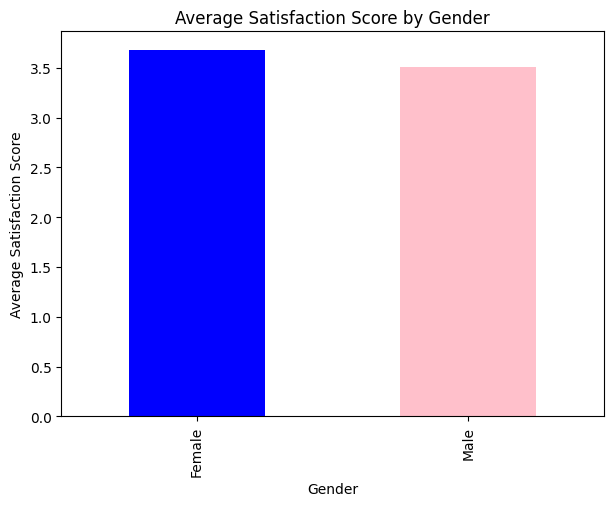

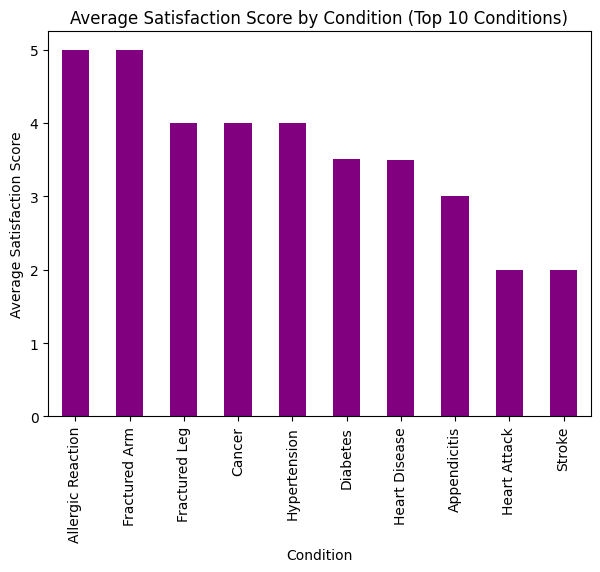

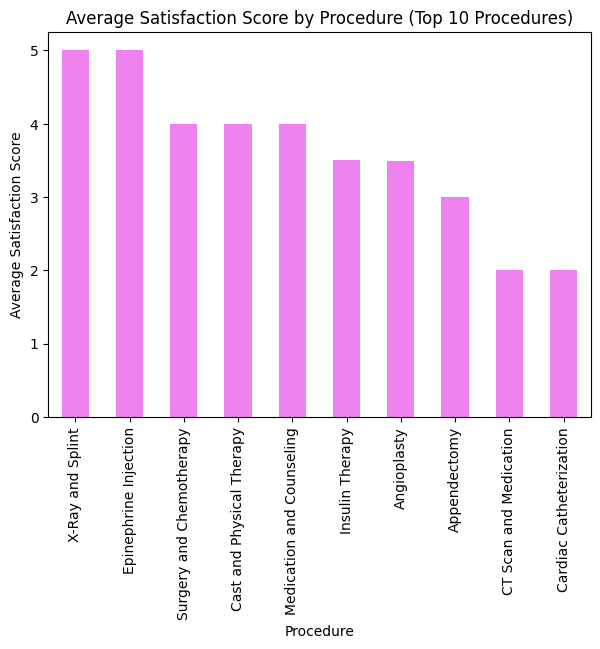

In [ ]:
# Plotting Satisfaction Scores by Gender
plt.figure(figsize=(7,5))
hospital_data.groupby('Gender')['Satisfaction'].mean().plot(kind='bar', color=['blue', 'pink'])
plt.title('Average Satisfaction Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Satisfaction Score')
plt.show()

# Plotting Satisfaction Scores by Condition (Top 10 Conditions)
top_conditions_satisfaction = hospital_data[hospital_data['Condition'].isin(top_conditions.index)]
condition_satisfaction = top_conditions_satisfaction.groupby('Condition')['Satisfaction'].mean().sort_values(ascending=False)

plt.figure(figsize=(7,5))
condition_satisfaction.plot(kind='bar', color='purple')
plt.title('Average Satisfaction Score by Condition (Top 10 Conditions)')
plt.xlabel('Condition')
plt.ylabel('Average Satisfaction Score')
plt.show()

# Plotting Satisfaction Scores by Procedure (Top 10 Procedures)
top_procedures_satisfaction = hospital_data[hospital_data['Procedure'].isin(top_procedures.index)]
procedure_satisfaction = top_procedures_satisfaction.groupby('Procedure')['Satisfaction'].mean().sort_values(ascending=False)

plt.figure(figsize=(7,5))
procedure_satisfaction.plot(kind='bar', color='violet')
plt.title('Average Satisfaction Score by Procedure (Top 10 Procedures)')
plt.xlabel('Procedure')
plt.ylabel('Average Satisfaction Score')
plt.show()


### **ReAdmission and Outcome Analysis**

<Figure size 1200x600 with 0 Axes>

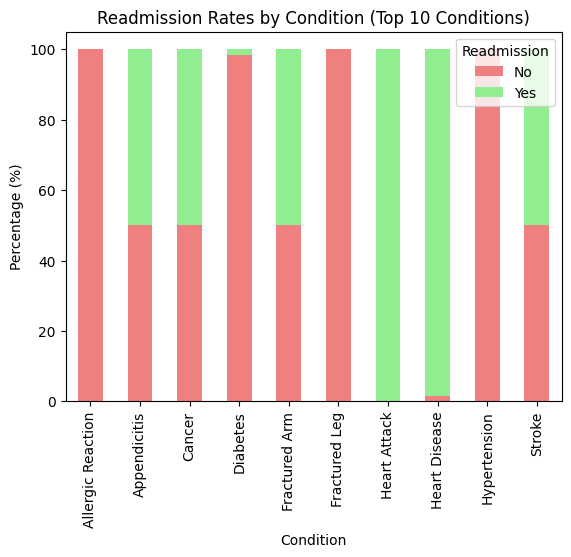

<Figure size 1200x600 with 0 Axes>

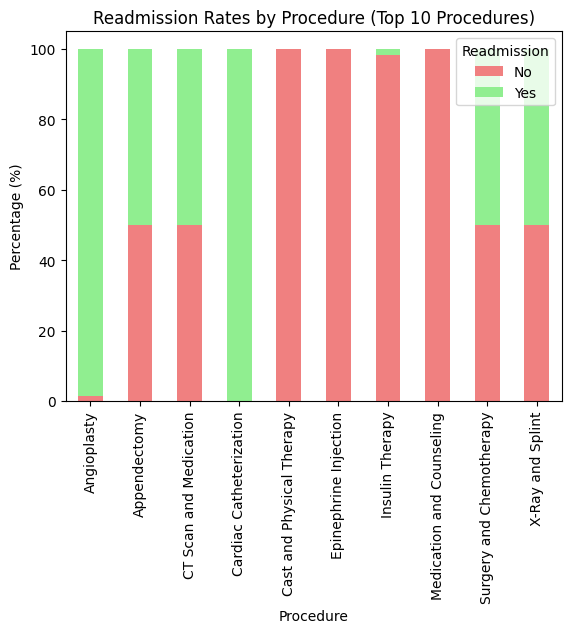

<Figure size 1200x600 with 0 Axes>

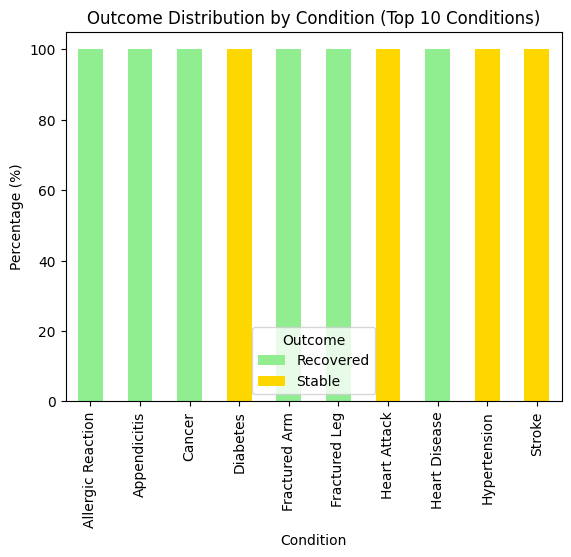

<Figure size 1200x600 with 0 Axes>

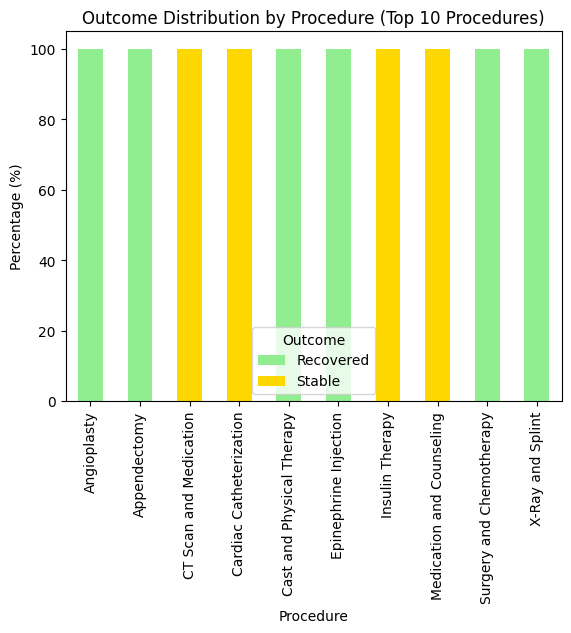

In [ ]:
# Readmission Rates by Condition (Top 10 Conditions)
condition_readmission = hospital_data[hospital_data['Condition'].isin(top_conditions.index)]
readmission_by_condition = pd.crosstab(condition_readmission['Condition'], condition_readmission['Readmission'], normalize='index') * 100

plt.figure(figsize=(12, 6))
readmission_by_condition.plot(kind='bar', stacked=True, color=['lightcoral', 'lightgreen'])
plt.title('Readmission Rates by Condition (Top 10 Conditions)')
plt.xlabel('Condition')
plt.ylabel('Percentage (%)')
plt.show()

# Readmission Rates by Procedure (Top 10 Procedures)
procedure_readmission = hospital_data[hospital_data['Procedure'].isin(top_procedures.index)]
readmission_by_procedure = pd.crosstab(procedure_readmission['Procedure'], procedure_readmission['Readmission'], normalize='index') * 100

plt.figure(figsize=(12, 6))
readmission_by_procedure.plot(kind='bar', stacked=True, color=['lightcoral', 'lightgreen'])
plt.title('Readmission Rates by Procedure (Top 10 Procedures)')
plt.xlabel('Procedure')
plt.ylabel('Percentage (%)')
plt.show()

# Outcome Analysis by Condition (Top 10 Conditions)
outcome_by_condition = pd.crosstab(condition_readmission['Condition'], condition_readmission['Outcome'], normalize='index') * 100

plt.figure(figsize=(12, 6))
outcome_by_condition.plot(kind='bar', stacked=True, color=['lightgreen', 'gold', 'red'])
plt.title('Outcome Distribution by Condition (Top 10 Conditions)')
plt.xlabel('Condition')
plt.ylabel('Percentage (%)')
plt.show()

# Outcome Analysis by Procedure (Top 10 Procedures)
outcome_by_procedure = pd.crosstab(procedure_readmission['Procedure'], procedure_readmission['Outcome'], normalize='index') * 100

plt.figure(figsize=(12, 6))
outcome_by_procedure.plot(kind='bar', stacked=True, color=['lightgreen', 'gold', 'red'])
plt.title('Outcome Distribution by Procedure (Top 10 Procedures)')
plt.xlabel('Procedure')
plt.ylabel('Percentage (%)')
plt.show()
